In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [19]:
temp = pd.read_csv('DataTemp/Data03max/TX_STAID002759.txt',index_col = 1 , parse_dates=True, skiprows = 19)

In [4]:
temp.head(5)

,SOUID,TX,Q_TX
DATE,,,
1876-01-01,127490,35,0
1876-01-02,127490,28,0
1876-01-03,127490,28,0
1876-01-04,127490,-18,0
1876-01-05,127490,-68,0


In [6]:
temp.loc[temp[' Q_TX'] == 9 ]

,SOUID,TX,Q_TX
DATE,,,
1945-04-25,127490,-9999,9
1945-04-26,127490,-9999,9
1945-04-27,127490,-9999,9
1945-04-28,127490,-9999,9
1945-04-29,127490,-9999,9
...,...,...,...
1945-10-27,127490,-9999,9
1945-10-28,127490,-9999,9
1945-10-29,127490,-9999,9


In [8]:
temp.loc[temp[' Q_TX'] == 1 ]

,SOUID,TX,Q_TX
DATE,,,


In [11]:
temp['1945-04-23':'1945-11-02']

,SOUID,TX,Q_TX
DATE,,,
1945-04-23,127490,97,0
1945-04-24,127490,115,0
1945-04-25,127490,-9999,9
1945-04-26,127490,-9999,9
1945-04-27,127490,-9999,9
...,...,...,...
1945-10-29,127490,-9999,9
1945-10-30,127490,-9999,9
1945-10-31,127490,-9999,9


In [20]:
temp.columns

Index([' SOUID', '   TX', ' Q_TX'], dtype='object')

In [21]:
temp.rename(columns={'   TX' : 'maxtemperature'}, inplace=True)

In [22]:
temp.rename_axis('Date',inplace=True)

In [15]:
temp.index[1400:1600]

DatetimeIndex(['1879-11-01', '1879-11-02', '1879-11-03', '1879-11-04',
               '1879-11-05', '1879-11-06', '1879-11-07', '1879-11-08',
               '1879-11-09', '1879-11-10',
               ...
               '1880-05-09', '1880-05-10', '1880-05-11', '1880-05-12',
               '1880-05-13', '1880-05-14', '1880-05-15', '1880-05-16',
               '1880-05-17', '1880-05-18'],
              dtype='datetime64[ns]', name='Date', length=200, freq=None)

In [23]:
temp['maxtemperature'] = temp['maxtemperature'] *0.1

In [24]:
temp.loc[temp['maxtemperature'] < -100 ]

,SOUID,maxtemperature,Q_TX
Date,,,
1945-04-25,127490,-999.9,9
1945-04-26,127490,-999.9,9
1945-04-27,127490,-999.9,9
1945-04-28,127490,-999.9,9
1945-04-29,127490,-999.9,9
...,...,...,...
1945-10-27,127490,-999.9,9
1945-10-28,127490,-999.9,9
1945-10-29,127490,-999.9,9


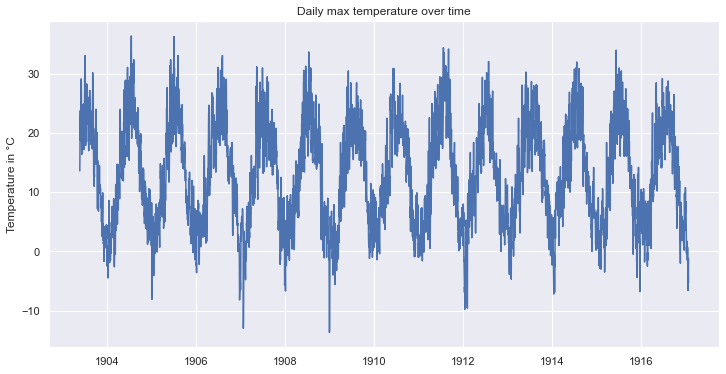

In [25]:
plt.title("Daily max temperature over time")
plt.ylabel('Temperature in °C')
#plt.ylim(-20,40)
plt.plot(temp.index[10000:15000],temp['maxtemperature'][10000:15000])

In [26]:
wtemp = temp.drop([' SOUID',' Q_TX'],axis=1)
wtemp

,maxtemperature
Date,
1876-01-01,3.5
1876-01-02,2.8
1876-01-03,2.8
1876-01-04,-1.8
1876-01-05,-6.8
...,...
2022-02-24,10.3
2022-02-25,7.5
2022-02-26,6.7


In [28]:
wtemp = wtemp.loc[wtemp['maxtemperature'] > -100]

In [ ]:
wtemp

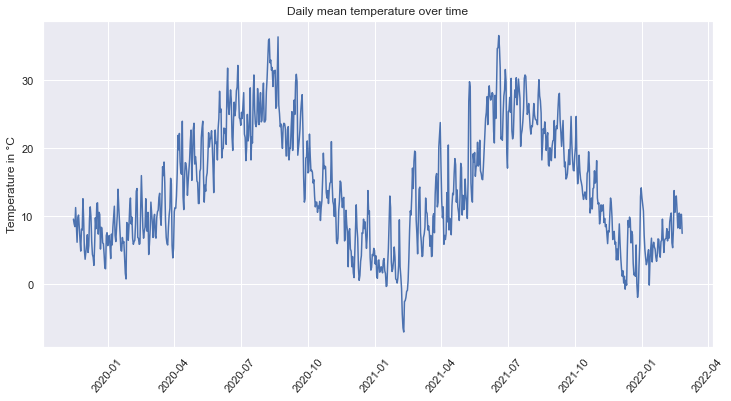

In [29]:
plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)
plt.plot(wtemp['2019-11-15':'2022-02-25'])

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

plt.title("Daily mean temperature over time")
plt.ylabel('Temperature in °C')
plt.xticks(rotation = 50)

y_av = movingaverage(wtemp['meantemperature'], 30)


plt.plot(wtemp.index[10000:15000],y_av[10000:15000])


In [ ]:
type(wtemp.index)

In [ ]:
wtemp.index.day

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
wtemp['timestep'] = range(len(wtemp))

C:\Users\aoe\AppData\Local\Temp/ipykernel_12196/2948537851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['timestep'] = range(len(wtemp))


In [32]:
X = wtemp[['timestep']] # matrix (or DataFrame)
y = wtemp['maxtemperature'] # vector (or Series)

In [33]:
m = LinearRegression()

In [34]:
m.fit(X, y)

LinearRegression()

In [35]:
wtemp['trend'] = m.predict(X)

C:\Users\aoe\AppData\Local\Temp/ipykernel_12196/4116631560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['trend'] = m.predict(X)


<AxesSubplot:xlabel='Date'>

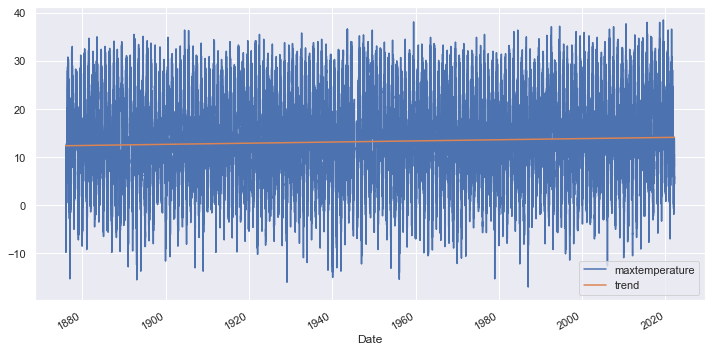

In [37]:
wtemp[['maxtemperature', 'trend']].plot()

C:\Users\aoe\AppData\Local\Temp/ipykernel_12196/1761049487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtemp['wo_trend'] = wtemp['maxtemperature'] - wtemp['trend']


<AxesSubplot:xlabel='Date'>

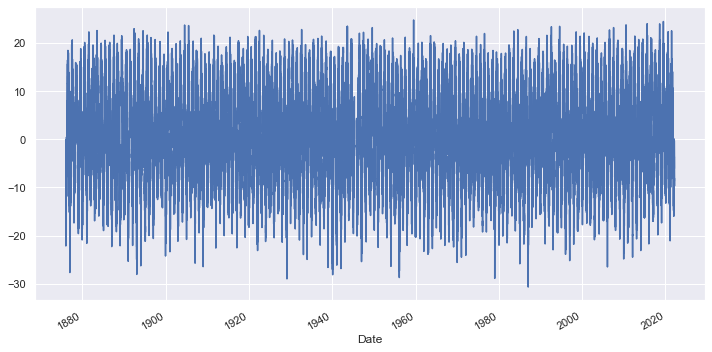

In [38]:
wtemp['wo_trend'] = wtemp['maxtemperature'] - wtemp['trend']

wtemp['wo_trend'].plot()

In [39]:
# One-Hot-Encoding the day
seasonal_dummies = pd.get_dummies(wtemp.index.day,
                                  prefix='day',
                                  drop_first=True).set_index(wtemp.index)

In [40]:
seasonal_dummies

,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
Date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-03,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-04,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-05,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2022-02-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2022-02-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
# join the dummies with the flights data frame
wtemp = wtemp.join(seasonal_dummies)

In [42]:
wtemp.head()

,maxtemperature,timestep,trend,wo_trend,day_2,day_3,day_4,day_5,day_6,day_7,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
Date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,3.5,0,12.369540,-8.869540,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.8,1,12.369573,-9.569573,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-03,2.8,2,12.369605,-9.569605,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-04,-1.8,3,12.369638,-14.169638,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-05,-6.8,4,12.369671,-19.169671,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Define X and y
X = wtemp.drop(columns=['maxtemperature', 'trend', 'wo_trend'])  # thus keeping timestep and months' dummies

# y is already defined (the number of passengers)

In [44]:
m.fit(X, y)
# Create a model with trend and seasonality
wtemp['trend + seasonal'] = m.predict(X)
wtemp.head()

,maxtemperature,timestep,trend,wo_trend,day_2,day_3,day_4,day_5,day_6,day_7,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,trend + seasonal
Date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,3.5,0,12.369540,-8.869540,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.457808
1876-01-02,2.8,1,12.369573,-9.569573,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.486241
1876-01-03,2.8,2,12.369605,-9.569605,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.496882
1876-01-04,-1.8,3,12.369638,-14.169638,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,12.466733
1876-01-05,-6.8,4,12.369671,-19.169671,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,12.527374


<AxesSubplot:xlabel='Date'>

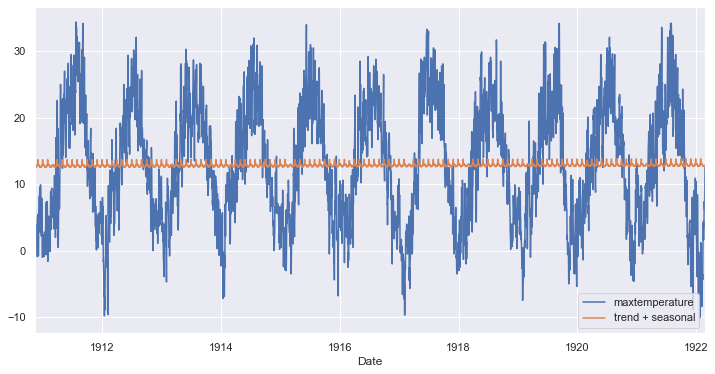

In [46]:
wtemp['1910-11-15':'1922-02-25'][['maxtemperature', 'trend + seasonal']].plot()

In [47]:
wtemp['remainder'] = wtemp['maxtemperature'] - wtemp['trend + seasonal']

<AxesSubplot:xlabel='Date'>

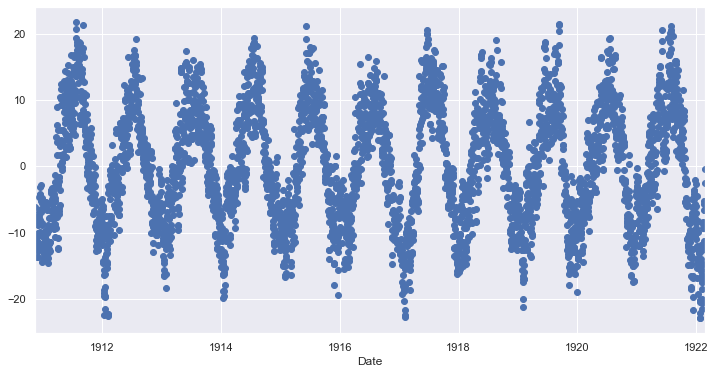

In [48]:
wtemp['1910-11-15':'1922-02-25']['remainder'].plot(style='o')

In [49]:
wtemp['remainder'].to_csv('wtemp_remainder_max_day.csv')

In [27]:
wtemp.columns

Index(['meantemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal', 'remainder'],
      dtype='object')

In [50]:
rtemp = wtemp.drop(columns=['maxtemperature', 'timestep', 'trend', 'wo_trend', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31',
       'trend + seasonal'])
rtemp.head(3)

,remainder
Date,
1876-01-01,-8.957808
1876-01-02,-9.686241
1876-01-03,-9.696882


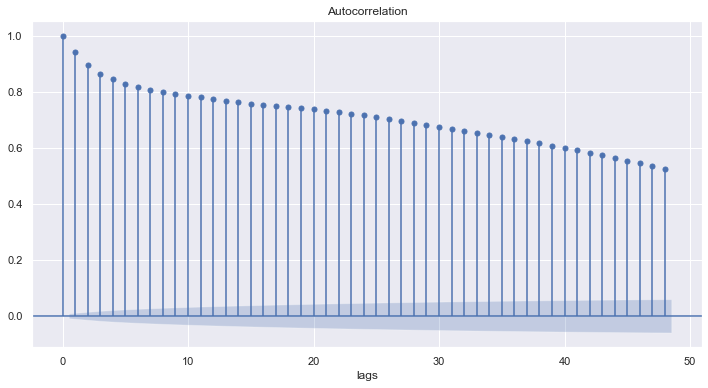

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rtemp['remainder'])
plt.xlabel('lags');

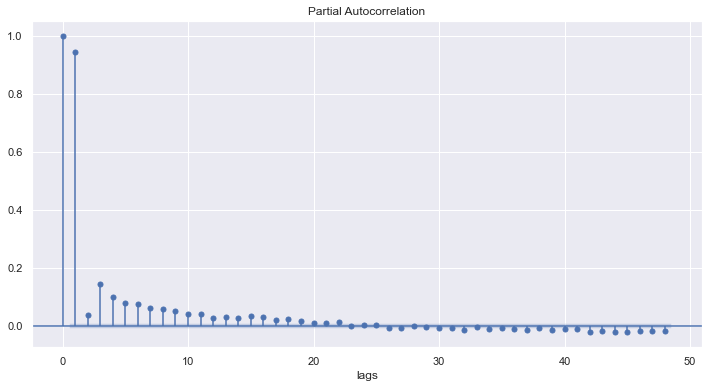

In [52]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(rtemp['remainder'])
plt.xlabel('lags');

In [63]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
selected_order = ar_select_order(rtemp['remainder'], maxlag = 21)
selected_order.ar_lags

C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\aoe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [54]:
Ntemp = wtemp.drop(columns=['trend', 'wo_trend','trend + seasonal'])

In [55]:
Ntemp['lag1'] = Ntemp['remainder'].shift(1)
Ntemp['lag2'] = Ntemp['remainder'].shift(2)
Ntemp['lag3'] = Ntemp['remainder'].shift(3)
Ntemp['lag4'] = Ntemp['remainder'].shift(4)
Ntemp['lag5'] = Ntemp['remainder'].shift(5)
Ntemp['lag6'] = Ntemp['remainder'].shift(6)
Ntemp['lag7'] = Ntemp['remainder'].shift(7)
Ntemp['lag8'] = Ntemp['remainder'].shift(8)
Ntemp['lag9'] = Ntemp['remainder'].shift(9)
Ntemp['lag10'] = Ntemp['remainder'].shift(10)
Ntemp['lag11'] = Ntemp['remainder'].shift(11)
Ntemp['lag12'] = Ntemp['remainder'].shift(12)

In [56]:
Ntemp.dropna(inplace = True)

In [58]:
X = Ntemp.drop(columns=['maxtemperature']) # matrix (or DataFrame)
y = Ntemp['maxtemperature'] # vector (or Series)

In [59]:
mN = LinearRegression()
mN.fit(X, y)

LinearRegression()

In [60]:
Ntemp['remainder_predict'] = mN.predict(X)

<AxesSubplot:xlabel='Date'>

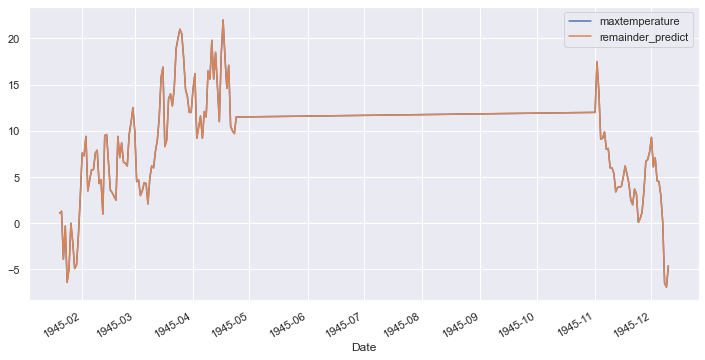

In [62]:
Ntemp['1945-01-20':'1945-12-10'][['maxtemperature', 'remainder_predict']].plot()